# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Load Datasets

In [2]:
def load_dataset(file_path):
    return pd.read_csv(file_path)

In [3]:
sym_des = pd.read_csv("datasets/symptoms_df.csv")
precautions = pd.read_csv("datasets/precautions_data.csv")
workout = pd.read_csv("datasets/workout_df.csv")
description = pd.read_csv("datasets/description.csv")
medications = pd.read_csv('datasets/medications.csv')
diets = pd.read_csv("datasets/diets.csv")
Training = pd.read_csv('datasets/Training.csv')

In [4]:
sym_des

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches
1,1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN
2,2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN
3,3,Fungal infection,itching,skin rash,dischromic patches,NaN
4,4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN
...,...,...,...,...,...,...
4915,4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning movements
4916,4916,Acne,skin rash,pus filled pimples,blackheads,scurring
4917,4917,Urinary tract infection,burning micturition,bladder discomfort,foul smell of urine,continuous feel of urine
4918,4918,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting


In [5]:
precautions.head()

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [ ]:
workout.head()

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods


In [7]:
description.head()

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [8]:
medications.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [9]:
diets.head()

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [10]:
Training

,itching,skin rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,stomach pain,acidity,ulcers on tongue,...,blackheads,scurring,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


# Preprocess dataset

In [11]:
def preprocess_data(dataset, target_column='prognosis'):
    X = dataset.drop(target_column, axis=1)  # Features
    y = dataset[target_column]  # Target
    le = LabelEncoder()
    y = le.fit_transform(y)  # Encode target labels
    return X, y, le

# Data Cleaning

In [12]:
import pandas as pd

# Assuming the DataFrame is already loaded as 'description'
# Display the first few rows of the dataset to confirm the structure
print(description.head())

# Data Cleaning Steps

# 1. Handle missing values (if any)
description = description.dropna()  # Drop rows with missing values

# 2. Remove any extra spaces or unwanted characters in text columns
description['Disease'] = description['Disease'].str.strip()
description['Description'] = description['Description'].str.strip()

# 3. Remove duplicates (if any)
description = description.drop_duplicates()

# 4. Correct any inconsistencies or capitalization issues
description['Disease'] = description['Disease'].str.title()  # Capitalize first letter of each word
description['Description'] = description['Description'].apply(lambda x: x.capitalize())  # Capitalize first letter of sentence

# 5. Remove unwanted characters or punctuation from 'Description' column (optional)
description['Description'] = description['Description'].str.replace(r'[^\w\s,\.]', '', regex=True)

# 6. Remove any leading or trailing spaces from columns (if not done earlier)
description['Disease'] = description['Disease'].str.strip()
description['Description'] = description['Description'].str.strip()

# Show the cleaned dataset
print("\nCleaned Dataset:")
print(description.head())


               Disease                                        Description
0     Fungal infection  Fungal infection is a common skin condition ca...
1              Allergy  Allergy is an immune system reaction to a subs...
2                 GERD  GERD (Gastroesophageal Reflux Disease) is a di...
3  Chronic cholestasis  Chronic cholestasis is a condition where bile ...
4        Drug Reaction  Drug Reaction occurs when the body reacts adve...

Cleaned Dataset:
               Disease                                        Description
0     Fungal Infection  Fungal infection is a common skin condition ca...
1              Allergy  Allergy is an immune system reaction to a subs...
2                 Gerd  Gerd gastroesophageal reflux disease is a dige...
3  Chronic Cholestasis  Chronic cholestasis is a condition where bile ...
4        Drug Reaction  Drug reaction occurs when the body reacts adve...


# Data Manipulation

In [13]:
import pandas as pd

# Load your dataset
df = pd.read_csv('datasets/description.csv')

# 1. Display first few rows to understand the data
print(df.head())

# 2. Filtering data: For example, filtering diseases with 'Hepatitis' in their name
hepatitis_diseases = df[df['Disease'].str.contains('Hepatitis', case=False)]
print("\nDiseases related to Hepatitis:")
print(hepatitis_diseases)

# 3. Add a new column based on conditions
# For example, add a column 'Urgency' based on the 'Disease' name
df['Urgency'] = df['Disease'].apply(lambda x: 'Urgent' if 'Hepatitis' in x else 'Non-Urgent')
print("\nDataset with Urgency column:")
print(df.head())

# 4. Sort the data by disease name
df_sorted = df.sort_values(by='Disease')
print("\nDataset sorted by Disease:")
print(df_sorted)

# 5. Group data by 'Urgency' and get the count of diseases in each category
urgency_grouped = df.groupby('Urgency').size()
print("\nDisease count by urgency:")
print(urgency_grouped)

# 6. Merge with another DataFrame if needed (e.g., treatment costs)
# Example: Assuming we have a treatment cost DataFrame
treatment_costs = {
    'Disease': ['Hepatitis A', 'Hepatitis B', 'Diabetes', 'Cancer'],
    'Cost': [1000, 1500, 500, 2000]
}

df_costs = pd.DataFrame(treatment_costs)
df_merged = pd.merge(df, df_costs, on='Disease', how='left')
print("\nMerged Dataset with Treatment Cost:")
print(df_merged.head())

# 7. Drop unnecessary columns
df_cleaned = df.drop(columns=['Urgency'])
print("\nDataset after dropping 'Urgency' column:")
print(df_cleaned.head())


               Disease                                        Description
0     Fungal infection  Fungal infection is a common skin condition ca...
1              Allergy  Allergy is an immune system reaction to a subs...
2                 GERD  GERD (Gastroesophageal Reflux Disease) is a di...
3  Chronic cholestasis  Chronic cholestasis is a condition where bile ...
4        Drug Reaction  Drug Reaction occurs when the body reacts adve...

Diseases related to Hepatitis:
                Disease                                        Description
19          hepatitis A              hepatitis A is a viral liver disease.
20          Hepatitis B  Hepatitis B is a viral infection that attacks ...
21          Hepatitis C  Hepatitis C is a viral infection that causes l...
22          Hepatitis D  Hepatitis D is a serious liver disease caused ...
23          Hepatitis E  Hepatitis E is a viral infection that causes l...
24  Alcoholic hepatitis  Alcoholic hepatitis is inflammation of the liv...

# Data Visualization

<Figure size 1400x800 with 0 Axes>

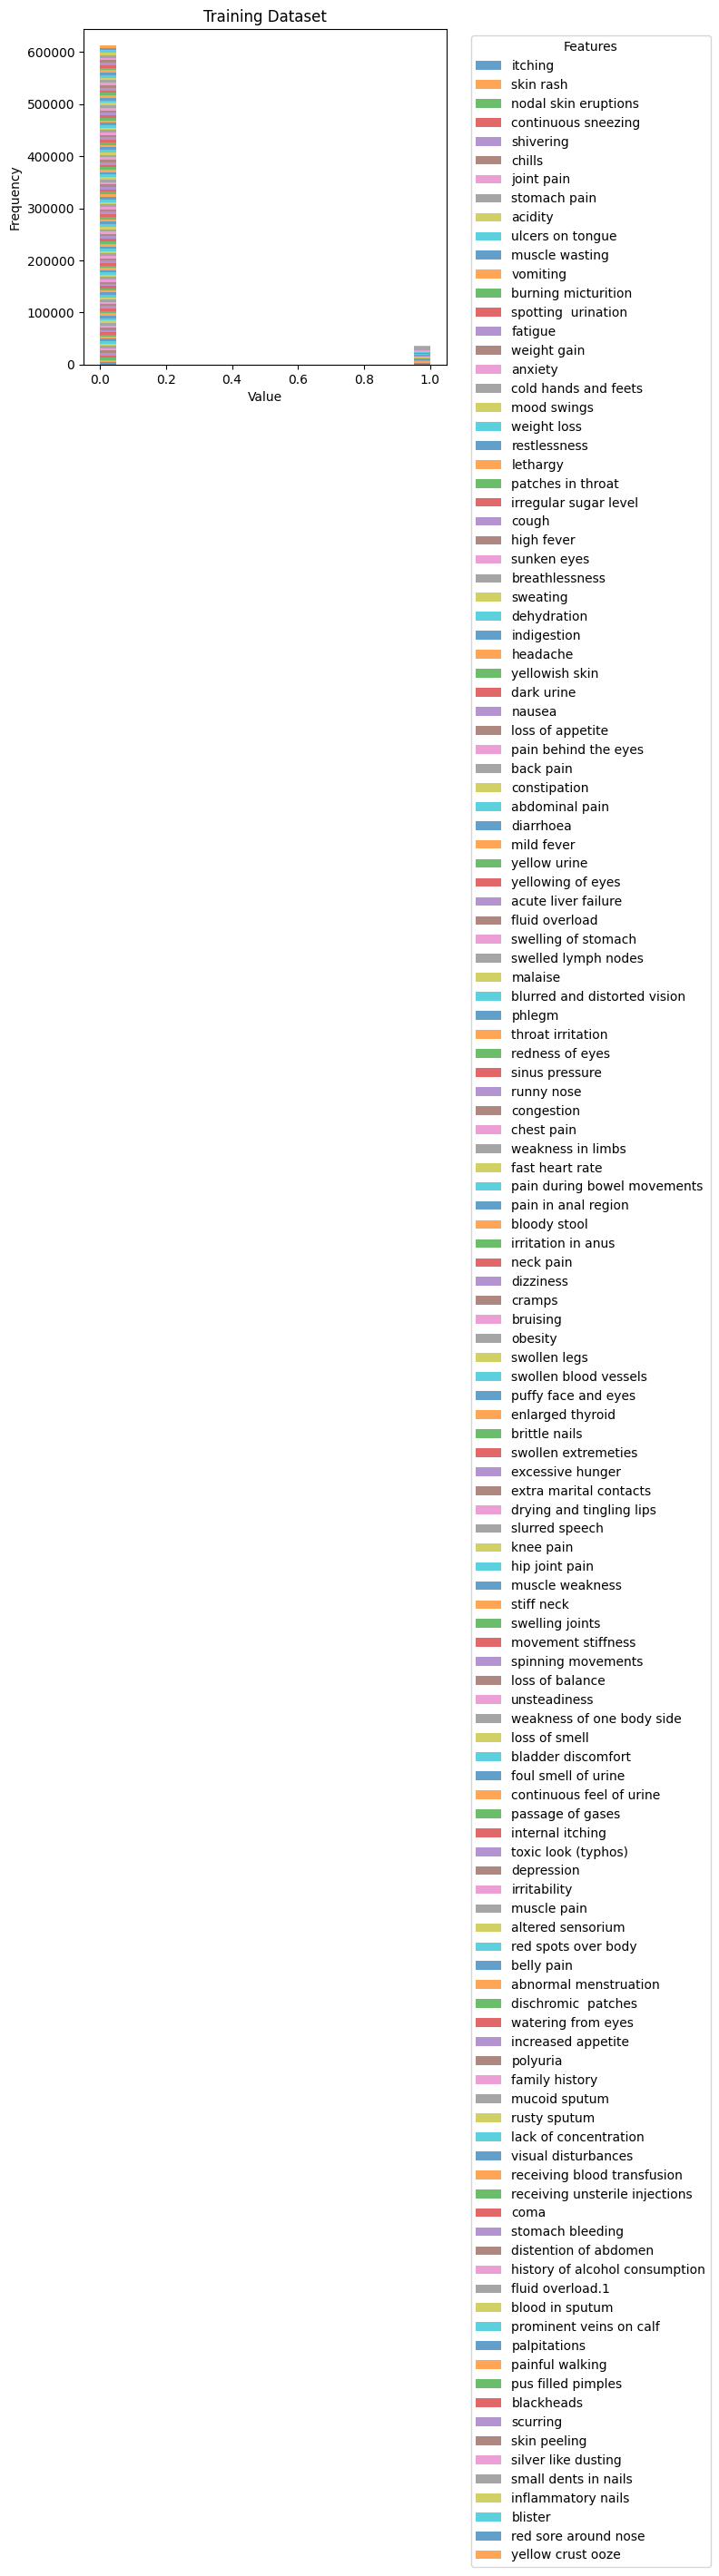

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('datasets/Training.csv')  # Replace with your dataset path

# Select only the numerical columns (if needed, exclude non-numeric columns)
numerical_data = dataset.select_dtypes(include=[np.number])

# Plotting a single histogram for all numerical features
plt.figure(figsize=(14, 8))  # Slightly wider figure
numerical_data.plot.hist(bins=20, alpha=0.7, stacked=True)
plt.title('Training Dataset')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.75)  # Adjust right margin to make room for the legend
plt.show()


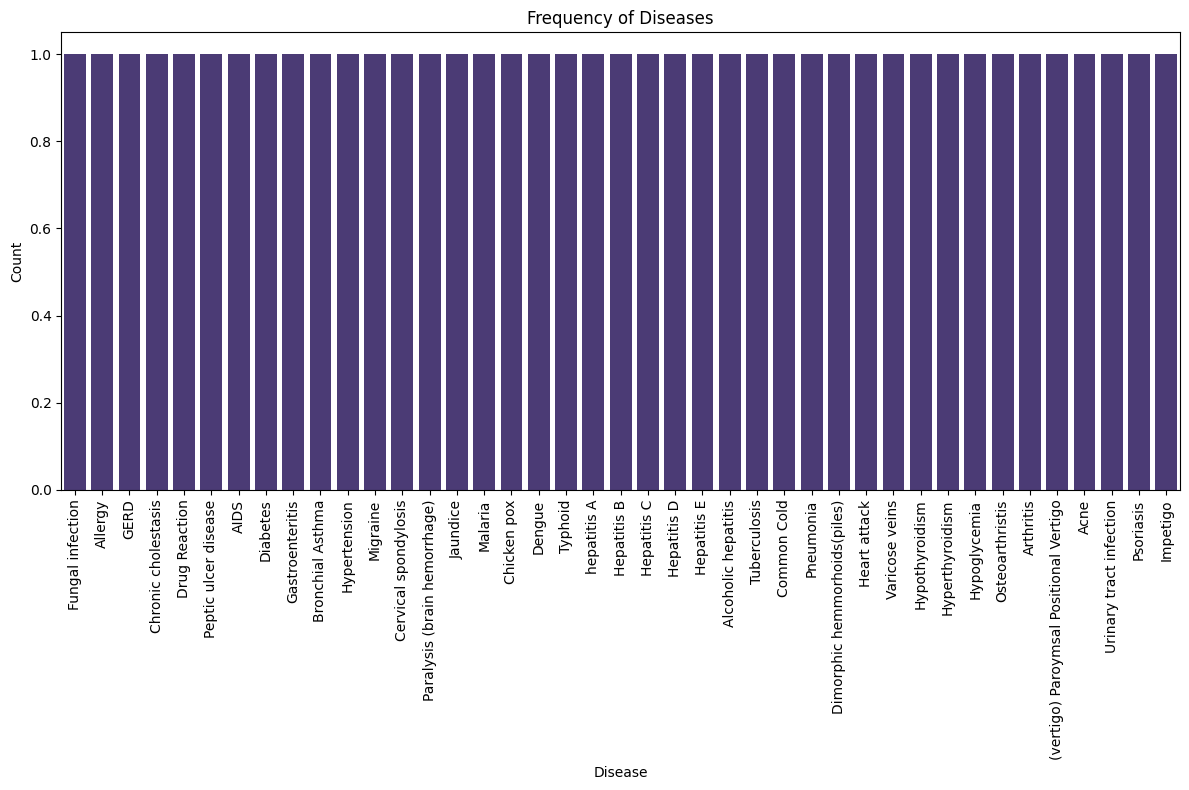

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('datasets/description.csv')  # Update the path to your description.csv

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Count the occurrences of each disease (if you have categories or other features, modify accordingly)
sns.countplot(x='Disease', data=df, color=sns.color_palette('viridis')[0])

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Frequency of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


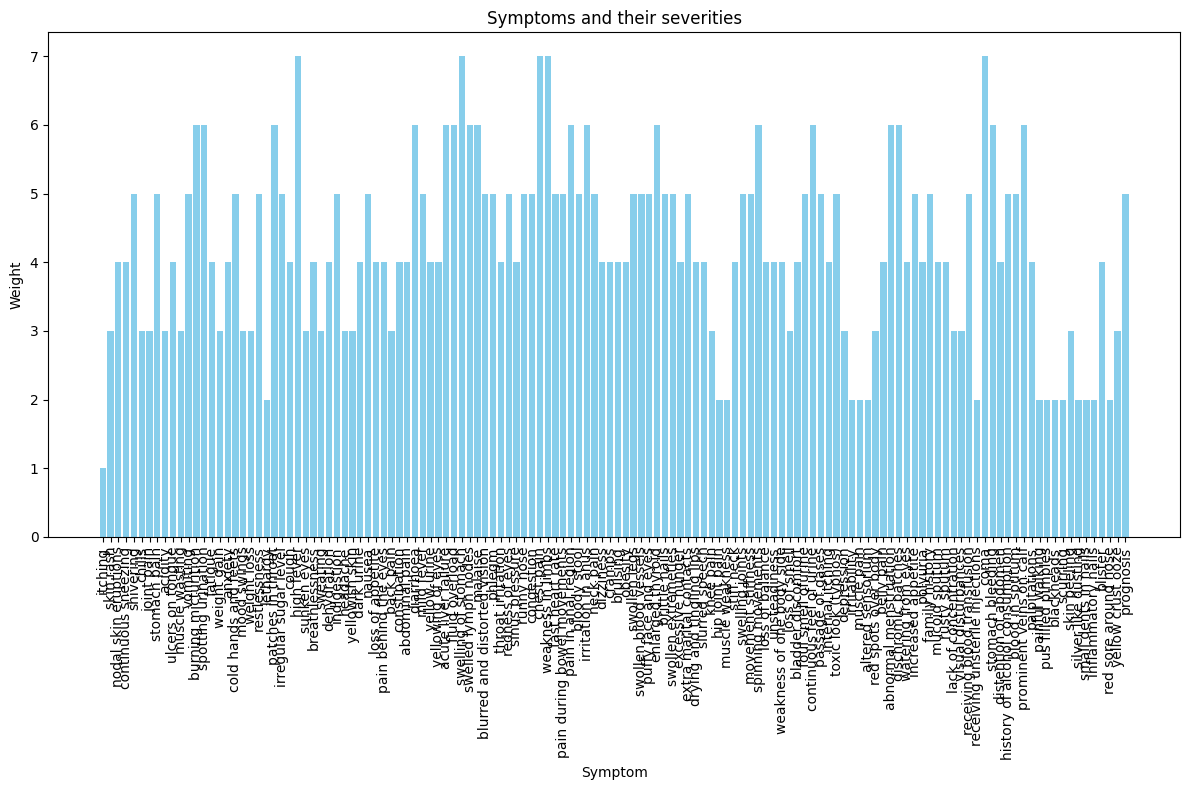

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datasets/Symptom-severity.csv')  # Update the path to your symptoms.csv

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Plotting a bar chart
plt.bar(df['Symptom'], df['weight'], color='skyblue')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Symptoms and their severities')
plt.xlabel('Symptom')
plt.ylabel('Weight')

# Show the plot
plt.tight_layout()
plt.show()


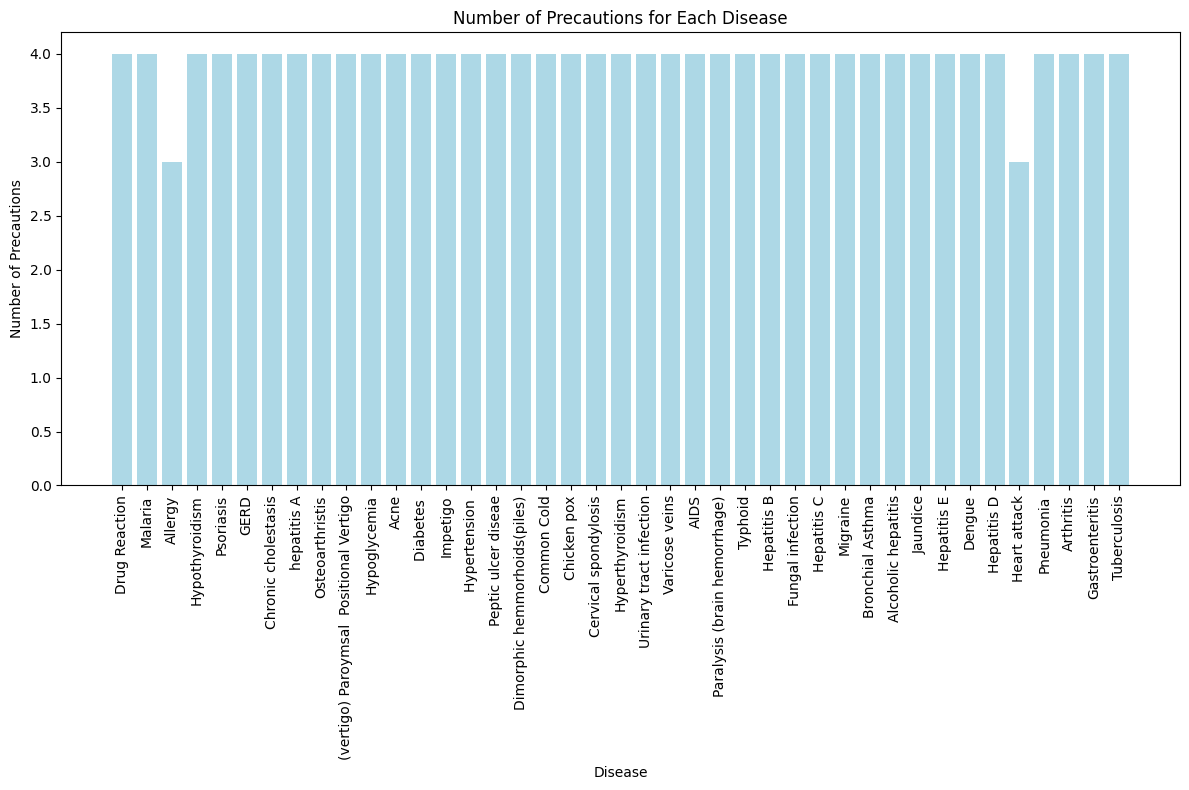

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load the dataset (update the path to your CSV file)
df = pd.read_csv('datasets/precautions_data.csv')  # Update the path to your precautions.csv

# Count the number of precautions (non-null entries) for each disease
df['Precautions Count'] = df[['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].notnull().sum(axis=1)

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Plotting a bar chart of diseases vs the number of precautions
plt.bar(df['Disease'], df['Precautions Count'], color='lightblue')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Number of Precautions for Each Disease')
plt.xlabel('Disease')
plt.ylabel('Number of Precautions')

# Show the plot
plt.tight_layout()
plt.show()


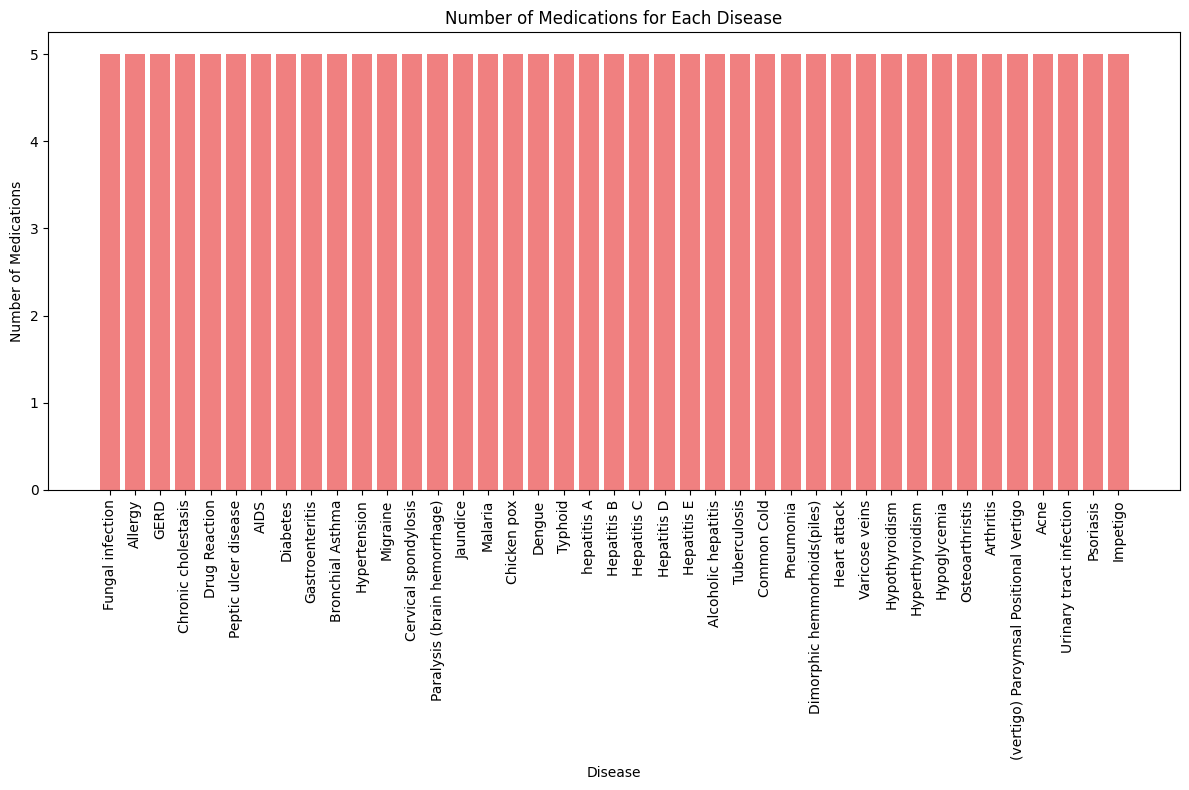

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load the dataset
df = pd.read_csv('datasets/medications.csv')  # Update the path to your medications.csv

# Convert the medication lists from string format to actual list format using ast.literal_eval
df['Medication'] = df['Medication'].apply(ast.literal_eval)

# Create a new column for the count of medications for each disease
df['Medication Count'] = df['Medication'].apply(len)

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Plotting a bar chart of diseases vs the number of medications
plt.bar(df['Disease'], df['Medication Count'], color='lightcoral')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Number of Medications for Each Disease')
plt.xlabel('Disease')
plt.ylabel('Number of Medications')

# Show the plot
plt.tight_layout()
plt.show()


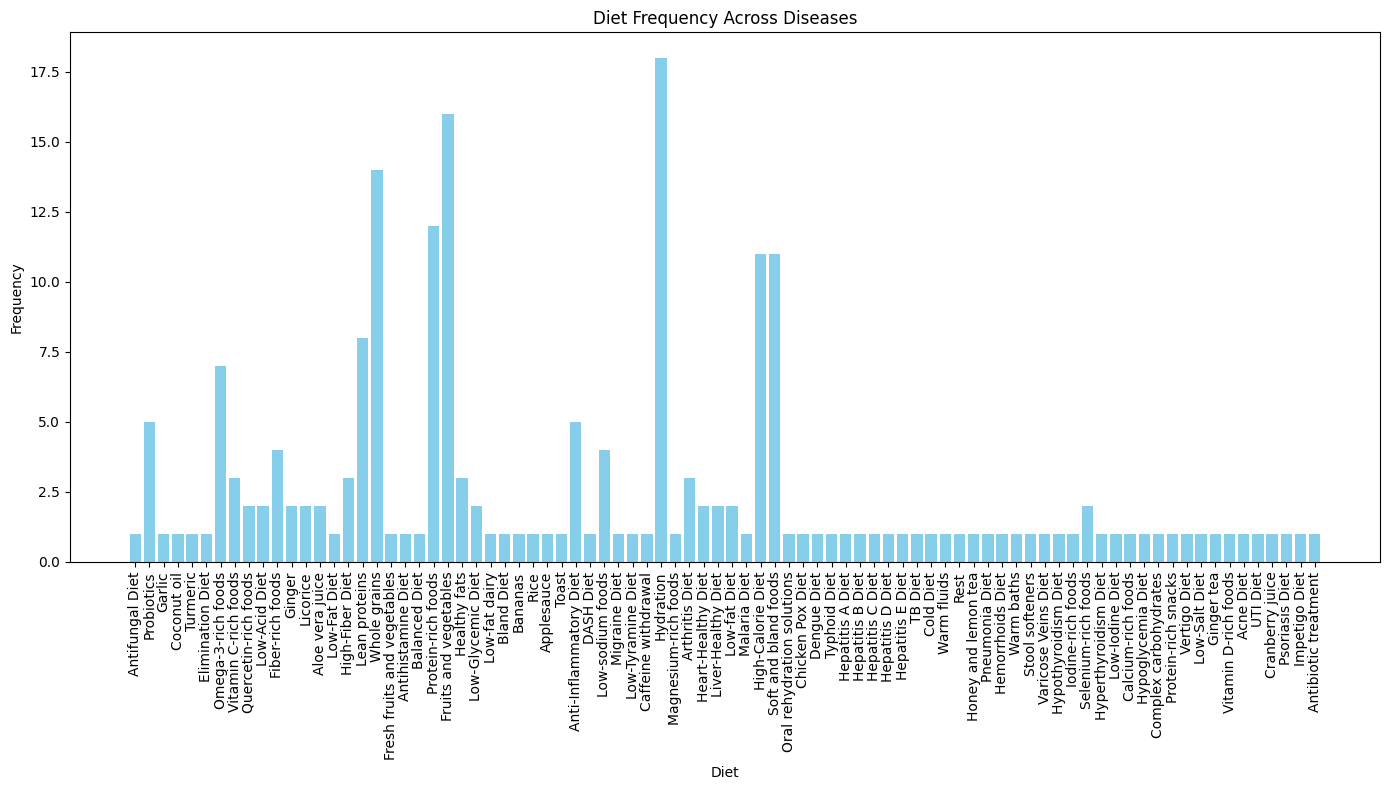

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Load the data from the CSV file
df = pd.read_csv('datasets/diets.csv')

# Convert the 'Diet' column from string list format to actual lists
df['Diet'] = df['Diet'].apply(ast.literal_eval)

# Flatten the list of all diets to count frequencies of each diet
all_diets = [diet for sublist in df['Diet'] for diet in sublist]

# Count the frequency of each diet
diet_counts = Counter(all_diets)

# Convert the counts into a DataFrame for better plotting
diet_df = pd.DataFrame(diet_counts.items(), columns=['Diet', 'Count'])

# Plotting the results
plt.figure(figsize=(14, 8))
plt.bar(diet_df['Diet'], diet_df['Count'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Diet Frequency Across Diseases')
plt.xlabel('Diet')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


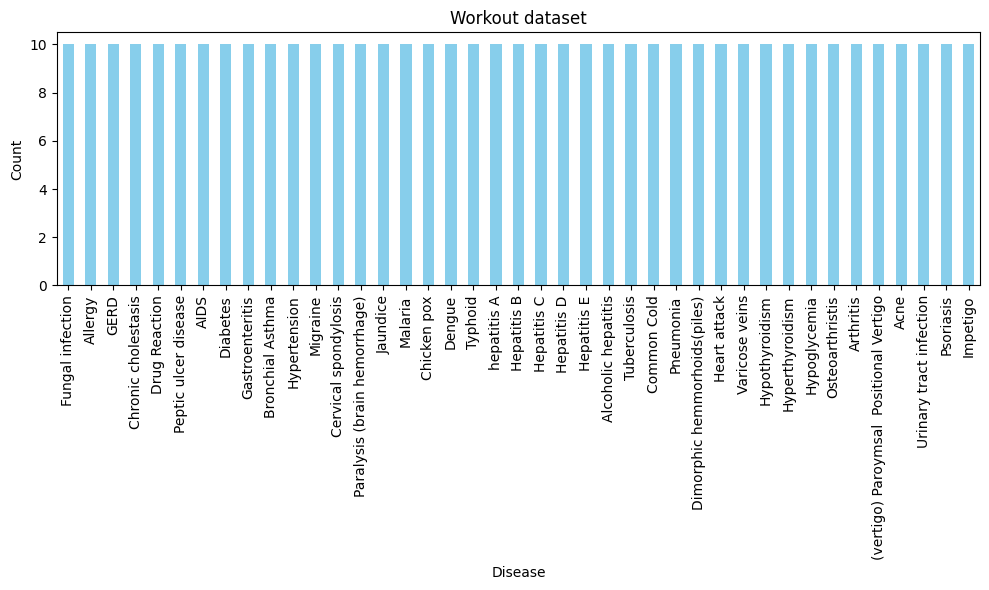

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv('datasets/workout_df.csv') # Replace with your actual file path

# To visualize the frequency of diseases in the dataset
disease_counts = data['disease'].value_counts()

# Plot a bar graph for the diseases and their frequencies
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar', color='skyblue')
plt.title('Workout dataset')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
def create_keras_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train multiple models

In [ ]:
def train_models(X_train, y_train):
    models = {
        'SVC': SVC(kernel='linear'),
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),        
        'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'KNeighbors': KNeighborsClassifier(n_neighbors=5),
        'MultinomialNB': MultinomialNB(),
        'LogisticRegression': LogisticRegression(max_iter=1000),
        'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
        'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
        'KerasNN': create_keras_model(X_train.shape[1])
    }
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

# Evaluate models

In [ ]:
def evaluate_models(models, X_test, y_test):
    for name, model in models.items():
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


from keras.models import Sequential
from keras.layers import Dense, Input

# Define the Keras model creation function
def create_keras_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Ensure all feature values are non-negative by shifting the data
X = X - X.min(axis=0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'KerasNN': create_keras_model(X_train.shape[1])
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Test the model
        predictions = model.predict(X_test)
        
        # Convert probabilities to binary values
        predictions_binary = (predictions > 0.5).astype(int)  # Apply threshold at 0.5
        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions_binary)
        print(f"{model_name} Accuracy: {accuracy}")

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, predictions)
        print(f"{model_name} Confusion Matrix:")
        print(np.array2string(cm, separator=', '))

        print("\n" + "="*40 + "\n")
    except Exception as e:
        print(f"Error with {model_name}: {e}\n" + "="*40 + "\n")


SVC Accuracy: 0.81
SVC Confusion Matrix:
[[126,  34],
 [ 23, 117]]


RandomForest Accuracy: 0.8866666666666667
RandomForest Confusion Matrix:
[[142,  18],
 [ 16, 124]]


GradientBoosting Accuracy: 0.8866666666666667
GradientBoosting Confusion Matrix:
[[139,  21],
 [ 13, 127]]


KNeighbors Accuracy: 0.9033333333333333
KNeighbors Confusion Matrix:
[[139,  21],
 [  8, 132]]


MultinomialNB Accuracy: 0.71
MultinomialNB Confusion Matrix:
[[113,  47],
 [ 40, 100]]


LogisticRegression Accuracy: 0.82
LogisticRegression Confusion Matrix:
[[130,  30],
 [ 24, 116]]


AdaBoost Accuracy: 0.8333333333333334
AdaBoost Confusion Matrix:
[[131,  29],
 [ 21, 119]]


NeuralNetwork Accuracy: 0.9466666666666667
NeuralNetwork Confusion Matrix:
[[150,  10],
 [  6, 134]]


XGBoost Accuracy: 0.9033333333333333
XGBoost Confusion Matrix:
[[141,  19],
 [ 10, 130]]


CatBoost Accuracy: 0.9366666666666666
CatBoost Confusion Matrix:
[[146,  14],
 [  5, 135]]


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.56

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X = X - X.min(axis=0)  # Normalize the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a Keras model
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
model = create_model()

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Make predictions
predictions = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{cm}")


u:\SDP\Final_SDP\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy: 0.95
Confusion Matrix:
[[149  11]
 [  4 136]]


# Save model

In [ ]:
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# Load model

In [ ]:
def load_model(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Debugging and Validation

In [ ]:
def debug_data_split(y_train, y_test):
    print(f"Train class distribution:\n{pd.Series(y_train).value_counts()}")
    print(f"Test class distribution:\n{pd.Series(y_test).value_counts()}")

def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    print(f"Cross-validation scores: {scores}")
    print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

# Chatbot interaction

In [1]:
def chatbot_interface(model, symptom_dict, label_encoder, helper_functions):
    print("Welcome to the Disease Prediction Chatbot!")
    print("Enter your symptoms separated by commas (e.g., 'itching, skin_rash'). Type 'exit' to quit.\n")
    
    while True:
        user_input = input("Your symptoms: ").strip().lower()
        if user_input == 'exit':
            print("Goodbye! Stay healthy!")
            break
        
        symptoms = [symptom_dict.get(symptom.strip(), 0) for symptom in user_input.split(",")]
        input_data = [0] * len(symptom_dict)
        for index in symptoms:
            if index:
                input_data[index] = 1
        
        input_df = pd.DataFrame([input_data])
        predicted_disease = label_encoder.inverse_transform(model.predict(input_df))[0]
        print(f"Predicted Disease: {predicted_disease}")
        
        # Retrieve all details for the predicted disease
        desc, precautions, meds, diet, workout = helper_functions(predicted_disease)
        
        # Display additional details
        if input("Do you want to see the description of this disease? (yes/no): ").strip().lower() == 'yes':
            print(f"\nDescription: {desc}")

        if input("Do you want to see the precautions for this disease? (yes/no): ").strip().lower() == 'yes':
            print("Precautions:")
            for p in precautions:
                print(f"- {p}")

        if input("Do you want to see the recommended medications? (yes/no): ").strip().lower() == 'yes':
            print("Medications:", ", ".join(meds))

        if input("Do you want to see the suggested diet? (yes/no): ").strip().lower() == 'yes':
            print("Diet:", ", ".join(diet))

        if input("Do you want to see the workout recommendations? (yes/no): ").strip().lower() == 'yes':
            print("Recommendations:", workout)

        print("\n" + "=" * 40)

# Helper functions for data retrieval

In [2]:
def helper(disease):
    desc = description[description['Disease'] == disease]['Description'].iloc[0]
    precautions_list = precautions.loc[precautions['Disease'] == disease].iloc[:, 1:].values.flatten().tolist()
    meds = medications[medications['Disease'] == disease]['Medication'].tolist()
    diet = diets[diets['Disease'] == disease]['Diet'].tolist()
    workout_plan = workout[workout['disease'] == disease]['workout'].iloc[0]
    return desc, precautions_list, meds, diet, workout_plan

# Main execution

In [ ]:
if __name__ == "__main__":
    # File paths
    symptoms_file_path = "datasets/Training.csv"
    precautions_file_path = 'datasets/precautions_data.csv'
    description_file_path = 'datasets/description.csv'
    medications_file_path = 'datasets/medications.csv'
    diets_file_path = 'datasets/diets.csv'
    workout_file_path = 'datasets/workout_df.csv'
    
    # Load and preprocess data
    symptoms_dataset = load_dataset(symptoms_file_path)
    X, y, label_encoder = preprocess_data(symptoms_dataset)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    
    # Debug: Check train-test distribution
    print("Debugging Train-Test Split:")
    debug_data_split(y_train, y_test)
    
    # Train models and evaluate
    trained_models = train_models(X_train, y_train)
    evaluate_models(trained_models, X_test, y_test)
    
    
    
    
    # Save the best model
    best_model = trained_models['NeuralNetwork']
    save_model(best_model, 'nn_model.pkl')
    
    save_model(label_encoder,'label_encoder.pkl')

    # Load additional data for chatbot
    precautions = load_dataset(precautions_file_path)
    description = load_dataset(description_file_path)
    medications = load_dataset(medications_file_path)
    diets = load_dataset(diets_file_path)
    workout = load_dataset(workout_file_path)

    # Build symptom dictionary
    symptoms_dict = {symptom: idx for idx, symptom in enumerate(X.columns)}

    # Start chatbot interface
    chatbot_interface(best_model, symptoms_dict, label_encoder, helper)


Debugging Train-Test Split:
Train class distribution:
23    94
28    92
18    92
2     92
29    91
14    91
25    91
15    90
21    89
40    89
30    88
16    88
13    88
8     88
6     87
5     87
38    86
36    84
22    84
24    84
32    84
20    83
10    83
31    83
33    82
26    82
27    82
7     81
34    80
0     80
37    79
39    79
17    79
12    79
4     78
11    78
19    78
1     77
35    77
3     74
9     71
Name: count, dtype: int64
Test class distribution:
9     49
3     46
35    43
1     43
11    42
19    42
4     42
17    41
37    41
39    41
12    41
0     40
34    40
7     39
33    38
27    38
26    38
10    37
20    37
31    37
32    36
36    36
24    36
22    36
38    34
6     33
5     33
30    32
16    32
8     32
13    32
40    31
21    31
15    30
14    29
29    29
25    29
18    28
2     28
28    28
23    26
Name: count, dtype: int64


u:\SDP\Final_SDP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:41:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0188 - loss: -209.4167
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Welcome to the Disease Prediction Chatbot!
Enter your symptoms separated by commas (e.g., 'itching, skin_rash'). Type 'exit' to quit.



u:\SDP\Final_SDP\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Predicted Disease: Fungal infection

Description: Fungal infection is a common skin condition caused by fungi.
Precautions:
- Fungal infection
- bath twice
- use detol or neem in bathing water
- keep infected area dry
- use clean cloths
Medications: ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
Diet: ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
Workout: Avoid sugary foods



u:\SDP\Final_SDP\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Predicted Disease: Drug Reaction

Description: Drug Reaction occurs when the body reacts adversely to a medication.
Precautions:
- Drug Reaction
- stop irritation
- consult nearest hospital
- stop taking drug
- follow up
Medications: ['Antihistamines', 'Epinephrine', 'Corticosteroids', 'Antibiotics', 'Antifungal Cream']
Diet: ['Antihistamine Diet', 'Omega-3-rich foods', 'Vitamin C-rich foods', 'Quercetin-rich foods', 'Probiotics']
Workout: Discontinue offending medication



u:\SDP\Final_SDP\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Predicted Disease: Fungal infection



u:\SDP\Final_SDP\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Predicted Disease: Fungal infection


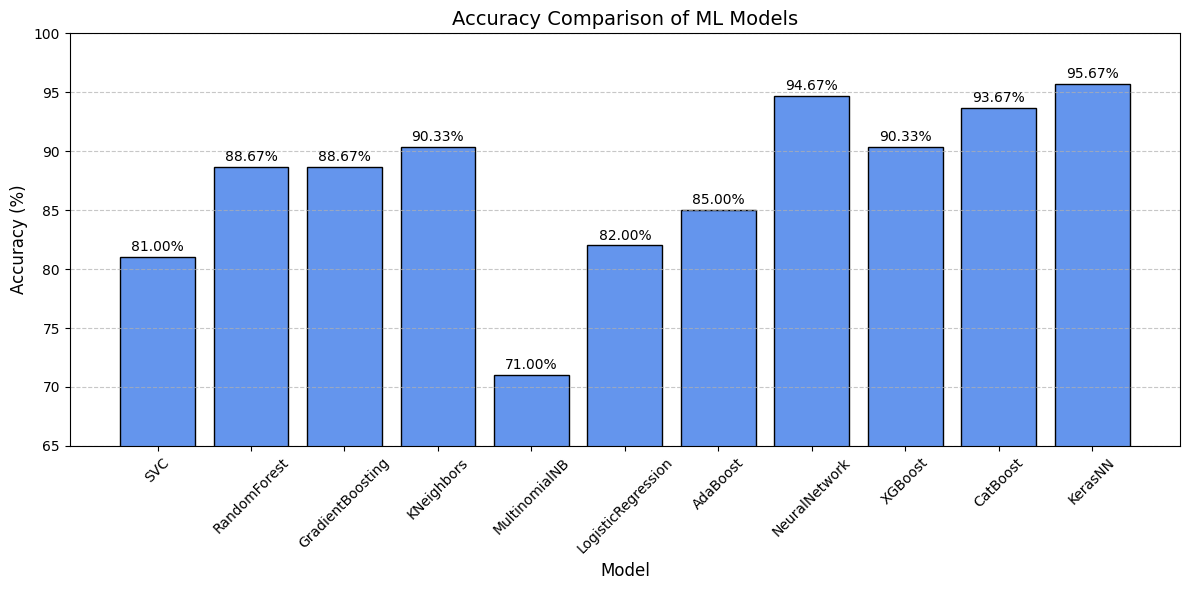

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracies (converted to percentages)
models = [
    'SVC', 'RandomForest', 'GradientBoosting', 'KNeighbors',
    'MultinomialNB', 'LogisticRegression', 'AdaBoost',
    'NeuralNetwork', 'XGBoost', 'CatBoost', 'KerasNN'
]
accuracies = [
    81.0, 88.67, 88.67, 90.33,
    71.0, 82.0, 85.0,
    94.67, 90.33, 93.67, 95.67
]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color='cornflowerblue', edgecolor='black')
plt.ylim(65, 100)
plt.title('Accuracy Comparison of ML Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Add value labels on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{acc:.2f}%', ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
